In [72]:
import numpy as np
import random
from scipy.stats import poisson, bernoulli, uniform
from collections import Counter
import matplotlib.pyplot as plt

In [128]:
def metropolis_hastings_poisson(l: int = 2):
    x = 0
    for t in range(100):
        coin = bernoulli(1/2).rvs()
        if coin:
            x_next = x + 1
            r = l/(x+1)
        else:
            x_next = x - 1
            r = x/l
            
        u = uniform.rvs()
        
        if u <= r:
            x = x_next
            
    return x

In [225]:
data = [metropolis_hastings_poisson(2) for _ in range(1000)]

In [226]:
poisson_data = poisson(2).rvs(1000)

In [227]:
poisson_pmf = poisson(2).pmf(range(8))*1000

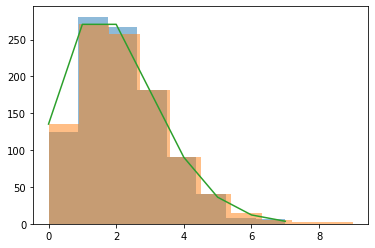

In [228]:
plt.hist(data, bins=len(set(data)), alpha=0.5)
plt.hist(poisson_data, bins=len(set(poisson_data)), alpha=0.5)
plt.plot(poisson_pmf)
plt.show()

In [229]:
def MC_transition_poisson(i: int, l: int):
    u = uniform.rvs()
    if u <= l/(2*(i+1)): 
        return i+1
    elif u <= l/(2*(i+1))+(1/2)*min(i/l, 1):
        return i-1
    else:
        return i

In [230]:
def MC_poisson(l: int):
    x = 0
    for t in range(100):
        x = MC_transition_poisson(x, l)
    return x

In [242]:
mc_data = [MC_poisson(2) for _ in range(1000)]

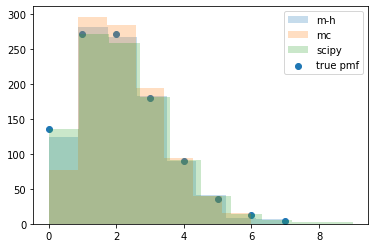

In [247]:
plt.hist(data, bins=len(set(data)), alpha=0.25, label='m-h')
plt.hist(mc_data, bins=len(set(mc_data)), alpha=0.25, label='mc')
plt.hist(poisson_data, bins=len(set(poisson_data)), alpha=0.25, label='scipy')
plt.scatter(range(len(poisson_pmf)), poisson_pmf, label='true pmf')
plt.legend()
plt.show()